In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\DeclareMathOperator{\expval}{\mathbb{E}} % Expected value
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



In this part, you’ll learn what you need of calculus for machine
learning and data science. The main topics covered in this part are
derivatives, partial derivatives, integrals and area under the curve.
You will need these essential notions for more advanced parts of the
book.

Calculus: Derivatives and Integrals
===================================

Calculus is a branch of mathematics that gives tools to study rate of
change of functions trough two main areas: derivatives and integrals. In
the context of machine learning and data science, you can for instance
use derivatives to optimize the parameters of a model with gradient
descent (as you’ll see in the hands-on project at the end of this
chapter). You might use integrals to calculate area under the curve (for
instance, to evaluate performance of a model with the ROC curve, or to
calculate probability from densities, as you’ll see in
Section 2.3.2 ).

1.1 Derivatives
---------------

### 1.1.1 Introduction

The *derivative* of a function is related to its *rate of change*. The
rate of change tells you how much the output of the function changes
when a change is done to the input. It is calculated as the ratio
between a change in the output and the corresponding change in the
input.

Graphically, it is the slope of the tangent at a given point of the
function.

Let’s start with an example. You measure the distance traveled (in
meters) of a moving train as a function of time (in seconds), as
represented in Figure [1](#fig:ch02_time_distance).

<img src="images/ch02_time_distance.png" id="fig:ch02_time_distance" width="300" alt="Figure 1: Example of a moving train. Distance is represented as a function of time." />
Figure 1: Example of a moving train. Distance is represented as a function of time.

Think about the rate of change of this function: it corresponds to the
distance traveled in a specific unit of time. With the train example, it
corresponds to another physical concept: speed.

Figure [1](#fig:ch02_time_distance) shows that the distance traveled by
the train in one unit of time is smaller at the beginning than at the
end. A larger distance was traveled between one and two seconds (in
green) in comparison to the distance traveled between zero and one
second (in red): the speed increases with time.

Now, say that you record the speed of the train.

<figure>
<img src="images/ch02_time_distance_speed.png" id="fig:ch02_time_distance_speed" width="400" alt="Figure 2: The left panel shows the distance (y-axis) as a function of time (x-axis) and the slope of the tangent at different point in time. The right panel shows the speed (y-axis) as a function of time." /><figcaption aria-hidden="true">Figure 2: The left panel shows the distance (<span class="math inline"><em>y</em></span>-axis) as a function of time (<span class="math inline"><em>x</em></span>-axis) and the slope of the tangent at different point in time. The right panel shows the speed (<span class="math inline"><em>y</em></span>-axis) as a function of time.</figcaption>
</figure>

Figure [2](#fig:ch02_time_distance_speed) shows again the distance as a
function of time in the left panel and the speed as a function of time
in the right panel.

Here is how these two functions are related. If you take the point at 1
second in the right panel (in red), you get a speed value of two meter
per second: this is the slope of the tangent line at 1 second in the
left panel (also in red). Similarly, any $y$ value on the right figure
gives you the slope of the tangent line for the corresponding $x$ value
in the left figure.

The slope in the left panel corresponds to the rate of change of the
function at this point. For instance, if you take the red slope, you can
see that in one unit of time, the distance traveled is 2 meters (for
instance, between $x=0$ and $x=1$, you go from $y=-1$ to $y=1$).

Mathematically, the plot in the right figure shows the derivative of the
function plotted in the left figure. The derivative of a function $f$
with respect to $x$ is the rate of change of $f$ as a function of $x$.
The derivative of $f$ is another function which takes $x$ as input and
returns the slope of the tangent line of $f$ at this value of $x$.

### 1.1.2 Mathematical Definition of Derivatives

#### Limits

You saw that the derivative at a point of a function is the slope of the
tangent line at this point. The value of the slope corresponds to the
*instantaneous rate of change* at this point, which is the rate of
change at a specific moment. A change occurs between two points so the
rate of change is calculated using two points. We consider that the
distance between these two points, usually called $\Delta x$ (you can
find a summary of the Greek letters used in this book at the beginning
of Section 12) and
pronounced *delta x* approaches zero. Only in this case, the rate of
change corresponds to the slope of the tangent at this point, and thus
to the derivative of the function at this point.

<img src="images/ch02_derivatives_tangent.png" id="fig:ch02_derivatives_tangent" width="500" alt="Figure 3: Comparison of the line corresponding to a large \Delta x (left) and a smaller \Delta x (right). You can see that the line approaches the tangent when \Delta x decreases." />
Figure 3: Comparison of the line corresponding to a large <span class="math inline"><em>Δ</em><em>x</em></span> (left) and a smaller <span class="math inline"><em>Δ</em><em>x</em></span> (right). You can see that the line approaches the tangent when <span class="math inline"><em>Δ</em><em>x</em></span> decreases.

Figure [3](#fig:ch02_derivatives_tangent) shows the function $f(x)$ (in
blue) and two points on the $x$-axis: $a$ and $a+\Delta x$. The value
$f(a)$ is the output of the function when the input is $a$ and
$f(a + \Delta x)$ when the input is $a + \Delta x$.

In the right plot, $\Delta x$ is small: when you decrease the difference
between the two points used to calculate the rate of change the line
approaches the tangent of the curve at $a$.

Mathematically, the difference between the two points on the curve when
$\Delta x$ approaches zero is denoted as:

$$
\lim_{\Delta x \to 0} f(x + \Delta x) - f(x)
$$

This is the concept of *limit*: this expression is read as “the limit of
$f(x + \Delta x) - f(x)$ as $\Delta x$ approaches zero”.

#### Calculating Derivatives

The rate of change is given by the slope of the tangent line.

<figure>
<img src="images/ch02_slope_delta_ratio.png" id="fig:ch02_slope_delta_ratio" width="500" alt="Figure 4: The slope of the green line is the ratio between \Delta y and \Delta x." /><figcaption aria-hidden="true">Figure 4: The slope of the green line is the ratio between <span class="math inline"><em>Δ</em><em>y</em></span> and <span class="math inline"><em>Δ</em><em>x</em></span>.</figcaption>
</figure>

Figure [4](#fig:ch02_slope_delta_ratio) illustrates how the rate of
change is calculated: it is the ratio between the change in the $y$-axis
($\Delta y$) and the change in the $x$-axis ($\Delta x$):

$$
\frac{\Delta y}{\Delta x} = \frac{f(a + \Delta x) - f(a)}{\Delta x}
$$

When $\Delta x$ approaches zero, this is the *differentiation equation*,
used to calculate the derivative of the function $f$ with respect to
$x$. It is denoted as:

$$
\frac{d f(x)}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
\qquad (1)$$

There are several kinds of mathematical notation that you can use to
write a derivative.

You can use the prime symbol $'$: the derivative of the function $f$ is
for instance denoted as $f'$. This is called the *Lagrange notation*.

With the *Leibniz notation*, you write:

$$
\frac{d f(x)}{dx}
$$

This refers to the derivative of $f(x)$ with respect to $x$ (the
variable $x$ is used for the differentiation). Going from $\Delta x$ to
$dx$ means that you take an infinitely small difference with the limit.
Note that this is not really a ratio, but a notation system (see this
question on the difference about ratio as notation in derivatives:
https://math.stackexchange.com/questions/21199/is-frac-textrmdy-textrmdx-not-a-ratio.)
. For instance,

$$
\frac{d (x^2 + 3)}{dx}
$$

corresponds to the derivative of $x^2 + 3$ with respect to $x$.

The Leibniz notation makes clear what is the variable over which you
differentiate but the Lagrange notation is more compact. In this book,
we’ll use both notations.

### 1.1.3 Derivatives of Linear And Nonlinear Functions

You can extract rules from the fact that a function derivative
corresponds to its rate of change.

#### Constant Function

The rate of change of a function is equal to zero when $y$ does not
depend on $x$ (when the value of $y$ is the same for any $x$). For
instance, take the function $f(x) = 4$:

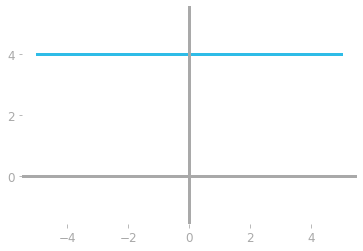

In [2]:

a = 0
b = 4

x = np.linspace(-5, 5, 100)
y = a * x + b

plt.plot(x, y)

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(2))

# draw axes
plt.axhline(0, c='#A9A9A9')
plt.axvline(0, c='#A9A9A9')

# assure x and y axis have the same scale
plt.axis('equal')

plt.show()


<img src="images/blank.png" id="fig:ch02_constant_function" alt="Figure 5: The constant function f(x) = 4." />
Figure 5: The constant function <span class="math inline"><em>f</em>(<em>x</em>) = 4</span>.

As shown in Figure [5](#fig:ch02_constant_function), the value of $y$ is
the same for any $x$. The slope of the function is equal to zero, so its
derivative is equal to zero:

$$
\frac{d f(x)}{dx} = 0
$$

The general rule is that the derivative of a constant $a$ is zero:

$$
\frac{d a}{dx} = 0
$$

This makes sense because constants doesn’t impact the slope of a
function.

#### Derivative of a Linear Function

Let’s now consider a linear function that is not constant:
$f(x) = 3x + 1$, as represented in Figure
[6](#fig:ch02_linear_function).

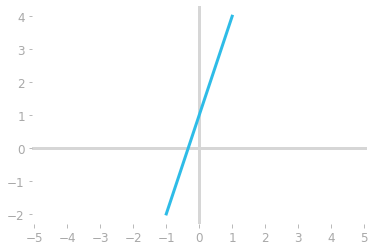

In [3]:

a = 3
b = 1

x = np.linspace(-1, 1, 100)
y = a * x + b

plt.plot(x, y)

# Assure that ticks are displayed with a specific step
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# draw axes
plt.axhline(0, c='#d6d6d6', zorder=0)
plt.axvline(0, c='#d6d6d6', zorder=0)

# assure x and y axis have the same scale
plt.axis('equal')

plt.show()


<img src="images/blank.png" id="fig:ch02_linear_function" alt="Figure 6: The linear function f(x) = 3x + 1." />
Figure 6: The linear function <span class="math inline"><em>f</em>(<em>x</em>) = 3<em>x</em> + 1</span>.

To differentiate sums, you can use the *sum rule of differentiation*,
which says that the derivative of the sum of two functions is equal to
the sum of the derivatives. Mathematically, you have:

$$
\frac{d f(x) + g(x)}{dx} = \frac{d f(x)}{dx} + \frac{d g(x)}{dx}
$$

In our example, the derivative of a the term $1$ is equal to zero
because it is a constant, so the remaining part is $3x$.

As you can see in Figure [6](#fig:ch02_linear_function), you go three
steps on the $y$-axis when you go one step on the $x$-axis so the slope
is three. The derivative of $f(x)$ is thus:

$$
\frac{d f(x)}{dx} = 3
$$

The general rule is that the derivative of functions with the form
$f(x)=ax+b$ is:

$$
\frac{d (ax+b)}{dx}=a
$$

With the derivative with respect to the variable $x$ (as denoted with
$dx$), only the values multiplied by $x$ have an effect on the slope.

#### Derivatives Of Nonlinear Functions

With nonlinear functions, you must characterize the slope of the tangent
for each point on the curve because the rate of change depends on $x$.

<figure>
<img src="images/ch02_x2_slope.png" id="fig:ch02_x2_slope" width="200" alt="Figure 7: Slopes at different values of x." /><figcaption aria-hidden="true">Figure 7: Slopes at different values of <span class="math inline"><em>x</em></span>.</figcaption>
</figure>

Look for instance at the function $f(x)=x^2$ in Figure
[7](#fig:ch02_x2_slope): the slope of the tangent line is different for
each value of $x$. For instance, the slope is zero at $x=0$ and
increases when $x$ increases. Similarly, when $x$ is negative, the slope
is negative. There is a relation between $x$ and the slope of $f$.

Let’s use the differentiation equation (see equation
[1](#eq:differentiation)) to calculate the derivative of $x^2$:

$$
\begin{aligned}
\frac{d f(x)}{dx} &= \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x} \\\\
\frac{d x^2}{dx} &= \lim_{\Delta x \to 0} \frac{(x + \Delta x)^2 - x^2}{\Delta x} \\\\
&= \lim_{\Delta x \to 0} \frac{x^2 + 2 x \Delta x + \Delta x^2 - x^2}{\Delta x} \\\\
&= \lim_{\Delta x \to 0} \frac{2 x \Delta x + \Delta x^2}{\Delta x} \\\\
&= \lim_{\Delta x \to 0} \frac{\Delta x (2x + \Delta x)}{\Delta x} \\\\
&= \lim_{\Delta x \to 0} 2x + \Delta x \\\\
&= 2x
\end{aligned}
$$

The general rule is that derivatives of power functions are given by the
following formula:

$$
\begin{aligned}
f(x) &= x^p\\\\
\frac{d f(x)}{dx} &= px^{p - 1}
\end{aligned}
$$

For instance, $\frac{d x^3}{dx} = 3x^2$.

### 1.1.4 Derivative Rules

It is often the case where the function you want to differentiate is
made of multiple functions, multiplied or interleaved. A key idea behind
differentiation is that you can use a small number of derivatives
calculated with the limit of the difference quotient (as you saw in the
last section). You can usually calculate the derivative of a function by
using rules such as addition, product, or composition, as you’ll see
here.

#### Multiplication by Constant

Constants can be extracted from derivatives. For instance:

$$
\frac{d (2 x^2)}{dx} = 2 \left(\frac{d x^2}{dx} \right) = 2 \cdot 2x = 4x
$$

More generally written:

$$
\frac{d (a f(x))}{dx} = a \frac{d f(x)}{dx}
$$

with $a$ being a constant.

#### Function Addition: The Sum Rule

The derivative of the sum of functions is equivalent to the sum of the
derivatives of these functions:

$$
\frac{d (f(x) + g(x))}{dx} = \frac{d f(x)}{dx} + \frac{d g(x)}{dx}
$$

#### Function Multiplication: The Product Rule

To differentiate the product of two functions, you must use the *product
rule*.

Let’s say that you want to differentiate the product of two functions
$f(x)$ and $g(x)$. You can’t just take the product of the derivatives:
you must use the following formula (you can refer to
https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-1-new/ab-2-8/a/proving-the-product-rule
if you want the proof of the product rule.) :

$$
\frac{d (f(x) g(x))}{dx} = \frac{d f(x)}{dx} \cdot g(x) + f(x) \cdot \frac{d g(x)}{dx}
$$

Or more compactly with the Lagrange notation:

$$
(fg)' = f'g + fg'
$$

In plain English, this means that you add the derivative of $f(x)$
multiplied by $g(x)$ to the derivative of $g(x)$ multiplied by $f(x)$.

##### Example

Let’s take the example of $x^3$. To illustrate the product rule, you can
consider $x^3$ as the product of $x$ and $x^2$. This means that in our
example, $f(x) = x$ and $g(x) = x^2$. Let’s apply the product rule:

$$
\frac{d (x \cdot x^2)}{dx} = \frac{d x}{dx} \cdot x^2 + x \cdot \frac{d x^2}{dx}
$$

Since the derivative of $x$ is one and the derivative of $x^2$ is $2x$,
you have:

$$
\begin{aligned}
\frac{d x}{dx} \cdot x^2 + x \cdot \frac{d x^2}{dx} &= 1 \cdot x^2 + x \cdot 2x\\\\
&= x^2 + 2x^2\\\\
&= 3x^2
\end{aligned}
$$

#### Function Composition: The Chain Rule

Composite function refers to the composition of two functions. As
function composition in computer science, one function takes the output
of the other as input. Consider for instance the functions $f(x) = x^2$
and $g(x) = 2x$. You can compose them as $f(g(x)) = f(2x) = (2x) ^ 2$.

To calculate derivatives of composite functions, you need to use the
*chain rule*: multiply the derivative of the outer expression with the
derivative of the inner expression:

$$
\frac{d f(g(x))}{dx} = \left( \frac{d f(g(x))}{dg(x)} \right) \cdot \left( \frac{d g(x)}{dx} \right)
$$

Note that the derivative of $f(g(x))$ is with respect to $g(x)$.

With the Lagrange notation:

$$
(f(g(x)))' = f'(g(x)) \cdot g'(x)
$$

##### Example

Let’s differentiate the following composite function $h(x)$:

$$
h(x) = f(g(x)) = (2x)^2
$$

You have the functions $f(x) = x^2$ and $g(x) = 2x$.

If you refer to the basic function derivatives (you can find a summary
of the rules to calculate basic derivatives here:
https://www.mathsisfun.com/calculus/derivatives-rules.html.) , you know
that $f'(x) = 2x$ and $g'(x) = 2$.

Let’s calculate the derivative of $h(x)$, which is, according to the
chain rule:

$$
h'(x) = f'(g(x)) \cdot g'(x)
$$

Since $f(g(x)) = g(x)^2$, you have $f'(g(x)) = 2g(x)$. In addition,
$g'(x)=2$, so you have:

$$
h'(x) = 2g(x) \cdot 2 = 2 \cdot 2x \cdot 2 = 8x
$$

The goal is to split composite functions into simpler functions and use
the known derivatives of these functions.

The chain rule is important to understand artificial neural networks:
the output of the network is calculated as the composition of multiple
nested functions (*forward propagation*). To update the network
parameters, the chain rule is used to calculate the derivative of the
cost function and update the parameters accordingly (*backpropagation*).

### 1.1.5 Partial Derivatives And Gradients

When a function has more than one variable, the concept of derivative is
a bit different: you need to compute the slope separately for each
variable.

For instance, in the physical world, you can imagine having a variable
corresponding to the direction “east/west” and a variable to the
direction “south/north”. It is possible to calculate the slope for each
direction. This is the purpose of *partial derivatives*, called
*partial* because you calculate the derivatives partially, variable per
variable.

#### Partial Derivatives

You can use the stylized cursive letter *d*, $\partial$, that can be
called “curly d”, to refer to partial derivatives.

Let’s take the following function as a first example:

$$
f(x_0, x_1) = x_0^2 + x_1^3
$$

The function $f$ takes the two variables $x_0$ and $x_1$ as input. Let’s
represent this function graphically. You’ll create a three-dimensional
plot because there are three variables (the dependent variable $y$, and
the independent variables $x_0$ and $x_1$).

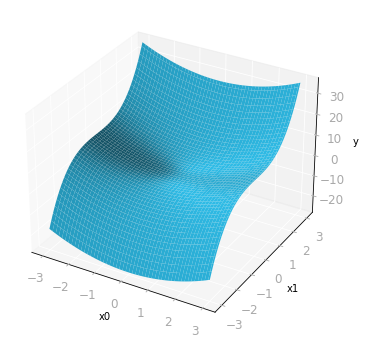

In [4]:
x0, x1 = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3, 3, 100))
y =  x0 ** 2 + x1 ** 3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x0, x1, y)
# [...] Add labels

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.show()


<img src="images/blank.png" id="fig:ch02_three_dimensional_function" alt="Figure 8: Three-dimensional representation of the function f(x_0, x_1) = x_0^2 + x_1^3." />
Figure 8: Three-dimensional representation of the function <span class="math inline"><em>f</em>(<em>x</em><sub>0</sub>, <em>x</em><sub>1</sub>) = <em>x</em><sub>0</sub><sup>2</sup> + <em>x</em><sub>1</sub><sup>3</sup></span>.

You can recognize in Figure [8](#fig:ch02_three_dimensional_function) a
mix between the function $x^2$ and the function $x^3$. If you run this
into a Jupyter Notebook, you can run `%matplotlib notebook` in a cell
before to be able to move the shape and have a better understanding of
the function.

Partial derivatives of $f(x_0, x_1) = x_0^2 + x_1^3$ are derivatives
with respect to each independent variable ($x_0$ and $x_1$). To
calculate the partial derivative of a function with respect to a single
variable, you consider all the other variables as constants (as they
don’t affect the slope of the tangent line in the direction you’re
considering).

Here is the partial derivative of $f(x_0, x_1)$ with respect to $x_0$
(considering $x_1$ as a constant):

$$
\begin{aligned}
\frac{\partial}{\partial x_0}f(x_0, x_1) &= \frac{\partial}{\partial x_0} \left( x_0^2 + x_1^3 \right) \\\\
&= 2x_0
\end{aligned}
$$

Note that the denominator tells you that you differentiate with respect
to $x_0$.

The partial derivative of $f(x)$ with respect to $x_1$:

$$
\begin{aligned}
\frac{\partial}{\partial x_1}f(x_0, x_1) &= \frac{\partial}{\partial x_1} \left( x_0^2 + x_1^3 \right) \\\\
&= 3x_1^2
\end{aligned}
$$

#### Gradient

If you calculate the derivative with respect to each variable of a
function ($f(x_0, x_1, ..., x_n)$):

$$
\begin{aligned}
\frac{\partial}{\partial x_0}f(x_0&, x_1, \cdots, x_n)\\\\
\frac{\partial}{\partial x_1}f(x_0&, x_1, \cdots, x_n)\\\\
&\vdots \\\\
\frac{\partial}{\partial x_n}f(x_0&, x_1, \cdots, x_n)
\end{aligned}
$$

and store all these partial derivatives in a vector (you’ll learn more
about vectors in Section 5) named
with the symbol $\nabla$ (“nabla”). It is the gradient of $f$:
$\nabla f$ is pronounced here “gradient of f”, “grad f” or “del f”, and
contains the partial derivatives of the function $f$ with respect to
each variable:

$$
\nabla f = \begin{bmatrix}
\frac{\partial}{\partial x_0}\\\\
\frac{\partial}{\partial x_1}\\\\
\vdots\\\\
\frac{\partial}{\partial x_n}
\end{bmatrix}
$$

The gradient of $f$ gives the slope corresponding to each variable. As
an analogy, if you are standing on a mountain, the gradient would tell
you what is the slope in each direction.

1.2 Integrals and the Area Under the Curve
------------------------------------------

*Integration* is the inverse operation of differentiation. Take a
function $f(x)$ and calculate its derivative $f'(x)$, the *indefinite
integral* (also called *antiderivative*) of $f'(x)$ gives you back
$f(x)$ (up to a constant, as you’ll soon see). (the link between
derivatives and integrals is described by what is called the
*fundamental theorem of calculus*.)

You can use integration to calculate the *area under the curve*, which
is the area of the shape delimited by the function, as shown in Figure
[9](#fig:ch02_area_under_the_curve).

<figure>
<img src="images/ch02_area_under_the_curve.png" id="fig:ch02_area_under_the_curve" width="100" alt="Figure 9: Area under the curve." /><figcaption aria-hidden="true">Figure 9: Area under the curve.</figcaption>
</figure>

A *definite integral* is the integral over a specific interval. It
corresponds to the area under the curve in this interval.

### 1.2.1 Example

You’ll see through this example how to understand the relationship
between the integral of a function and the area under the curve. To
illustrate the process, you’ll approximate the integral of the function
$g(x) = 2x$ using a discretization of the area under the curve.

#### Example Description

Let’s take again the example of the moving train. You saw that speed as
a function of time was the derivative of distance as a function of time.
These functions are represented in Figure
[10](#fig:ch02_distance_speed).

<img src="images/ch02_distance_speed.png" id="fig:ch02_distance_speed" width="300" alt="Figure 10: The left panel shows f(x) which is the distance as a function of time, and the right panel its derivative g(x), which is the speed as a function of time." />
Figure 10: The left panel shows <span class="math inline"><em>f</em>(<em>x</em>)</span> which is the distance as a function of time, and the right panel its derivative <span class="math inline"><em>g</em>(<em>x</em>)</span>, which is the speed as a function of time.

The function shown in the left panel of Figure
[10](#fig:ch02_distance_speed) is defined as $f(x) = x^2$. Its
derivative is defined as $g(x)=2x$.

In this example, you’ll learn how to find an approximation of the area
under the curve of $g(x)$.

#### Slicing the Function

To approximate the area of a shape, you can use the slicing method: you
cut the shape into small slices with an easy shape like rectangles,
calculate the area of each of these slices and sum them.

You’ll do exactly that to find an approximation of the area under the
curve of $g(x)$.

<figure>
<img src="images/ch02_speed_function_slices.png" id="fig:ch02_speed_function_slices" width="250" alt="Figure 11: Approximation of the area under the curve by discretizing the area under the curve of speed as a function of time." /><figcaption aria-hidden="true">Figure 11: Approximation of the area under the curve by discretizing the area under the curve of speed as a function of time.</figcaption>
</figure>

Figure [11](#fig:ch02_speed_function_slices) shows the area under the
curve of $f'(x)$ sliced as one-second rectangles (let’s call this
difference $\Delta x$). Note that we underestimated the area (look at
the missing triangles), but we’ll fix that later.

Let’s try to understand the meaning of the slices. Take the first one:
its area is defined as $2 \cdot 1$. The height of the slice is the speed
at one second (the value is 2). So there are two units of speed by one
unit of time for this first slice. The area corresponds to a
multiplication between speed and time: this is a distance.

For instance, if you drive at 50 miles per hour (speed) for two hour
(time), you traveled $50 \cdot 2 = 100$ miles (distance). This is
because the unit of speed corresponds to a ratio between distance and
time (like miles *per* hour). You get:

$$
\frac{\text{distance}}{\text{time}} \cdot \text{time} = \text{distance}
$$

To summarize, the derivative of the distance by time function is the
speed by time function, and the area under the curve of the speed by
time function (its integral) gives you a distance. This is how
derivatives and integrals are related.

#### Implementation

Let’s use slicing to approximate the integral of the function $g(x)=2x$.
First, let’s define the function $g(x)$:

In [5]:
def g_2x(x):
    return 2 * x

As illustrated in Figure [11](#fig:ch02_speed_function_slices), you’ll
consider that the function is discrete and take a step of
$\Delta x = 1$. You can create an $x$-axis with values from zero to six,
and apply the function `g_2x()` for each of these values. You can use
the Numpy method `arange(start, stop, step)` to create an array filled
with values from `start` to `stop` (not included):

In [6]:
delta_x = 1
x = np.arange(0, 7, delta_x)
x

array([0, 1, 2, 3, 4, 5, 6])

In [7]:
y = g_2x(x)
y

array([ 0,  2,  4,  6,  8, 10, 12])

You can then calculate the slice’s areas by iterating and multiplying
the width ($\Delta_x$) by the height (the value of $y$ at this point).
of the slice. As you saw, this area (`delta_x * y[i-1]` in the code
below) corresponds to a distance (the distance of the moving train
traveled during the $i$th slice). You can finally append the results to
an array (`slice_area_all` in the code below).

Note that the index of `y` is `i-1` because the rectangle is on the left
of the $x$ value you estimate. For instance, the area is zero for $x=0$
and $x=1$.

In [8]:
slice_area_all = np.zeros(y.shape[0])
for i in range(1, len(x)):
    slice_area_all[i] = delta_x * y[i-1]
slice_area_all

array([ 0.,  0.,  2.,  4.,  6.,  8., 10.])

These values are the slice’s areas.

To calculate the distance traveled from the beginning to the
corresponding time point (and not corresponding to each slice), you can
calculate the cumulative sum of `slice_area_all` with the Numpy function
`cumsum()`:

In [9]:
slice_area_all = slice_area_all.cumsum()
slice_area_all

array([ 0.,  0.,  2.,  6., 12., 20., 30.])

These are the estimated values of the area under the curve of $g(x)$ as
a function of $x$. You know that the function $g(x)$ is the derivative
of $f(x)=x^2$, so you should get back $f(x)$ by the integration of
$g(x)$.

Let’s plot our estimation and $f(x)$, which we’ll call the “true
function”, to compare them:

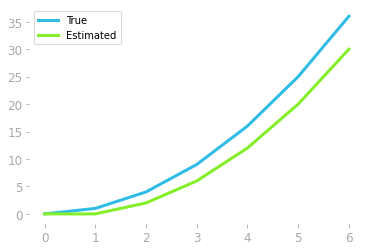

In [10]:
plt.plot(x, x ** 2, label='True')
plt.plot(x, slice_area_all, label='Estimated')

plt.legend()
plt.show()


<img src="images/blank.png" id="fig:ch02_estimation_integration" alt="Figure 12: Comparison of the estimated and original function." />
Figure 12: Comparison of the estimated and original function.

The estimation represented in Figure
[12](#fig:ch02_estimation_integration) shows that the estimation is not
bad, but could be improved. This is because we missed all these
triangles represented in red in Figure
[13](#fig:ch02_speed_function_slices_misses). One way to reduce the
error is to take a smaller value for $\Delta x$, as illustrated in the
right panel in Figure [13](#fig:ch02_speed_function_slices_misses).

<figure>
<img src="images/ch02_speed_function_slices_misses.png" id="fig:ch02_speed_function_slices_misses" width="300" alt="Figure 13: Missing parts in slices of the speed function (in red). The error is smaller with a smaller \Delta x." /><figcaption aria-hidden="true">Figure 13: Missing parts in slices of the speed function (in red). The error is smaller with a smaller <span class="math inline"><em>Δ</em><em>x</em></span>.</figcaption>
</figure>

Let’s estimate the integral function with $\Delta x = 0.1$:

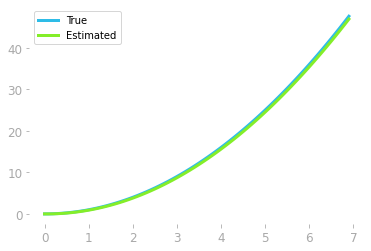

In [11]:
delta_x = 0.1
x = np.arange(0, 7, delta_x)
y = g_2x(x)
#  [...] Calculate and plot slice_area_all

slice_area_all = np.zeros(y.shape[0])
for i in range(1, len(x)):
    slice_area_all[i] = delta_x * y[i - 1]

slice_area_all = slice_area_all.cumsum()

plt.plot(x, x ** 2, label='True')
plt.plot(x, slice_area_all, label='Estimated')
plt.legend()

plt.show()


<img src="images/blank.png" id="fig:ch02_better_estimation_integration" alt="Figure 14: Smaller slice widths lead to a better estimation of the original function." />
Figure 14: Smaller slice widths lead to a better estimation of the original function.

As shown in Figure [14](#fig:ch02_better_estimation_integration), you
recovered (at least, up to an additive constant) the original function
whose derivative you integrated.

#### Extension

In our previous example, you integrated the function $2x$, which is a
linear function, but the principle is the same for any continuous
function (see Figure [15](#fig:ch02_integrals_segments_non_linear) for
instance).

<figure>
<img src="images/ch02_integrals_segments_non_linear.png" id="fig:ch02_integrals_segments_non_linear" width="200" alt="Figure 15: The slicing method can be used with many linear or nonlinear function, including all continuous functions." /><figcaption aria-hidden="true">Figure 15: The slicing method can be used with many linear or nonlinear function, including all continuous functions.</figcaption>
</figure>

### 1.2.2 Riemann Sum

Approximating an integral using this slicing method is called a *Riemann
sum*. Riemann sums can be calculated in different ways, as you can see
in Figure [16](#fig:ch02_riemann).

<img src="images/ch02_riemann.png" id="fig:ch02_riemann" width="250" alt="Figure 16: Four kinds of Riemann sums for integral approximation." />
Figure 16: Four kinds of Riemann sums for integral approximation.

As pictured in Figure [16](#fig:ch02_riemann), with the left Riemann
sum, the curve is aligned with the left corner of the rectangle. With
the right Riemann sum, the curve is aligned with the right corner of the
rectangle. With the midpoint rule, the curve is aligned with the center
of the rectangle. With the trapezoidal rule, a trapezoidal shape is used
instead of a rectangle. The curve crosses both top corners of the
trapezoid.

### 1.2.3 Mathematical Definition

In the last section, you saw the relationship between the area under the
curve and integration (you got back the original function from the
derivative). Let’s see now the mathematical definition of integrals.

The integrals of the function $f(x)$ with respect to $x$ is denoted as
follows:

$$
\int f(x) \: dx
$$

The symbol $dx$ is called the *differential* of $x$ and refers to the
idea of an infinitesimal change of $x$. It is a difference in $x$ that
approaches 0. The main idea of integrals is to sum an infinite number of
slices which have an infinitely small width.

The symbol $\int$ is the integral sign and refers to the sum of an
infinite number of slices.

The height of each slice is the value $f(x)$. The multiplication of
$f(x)$ and $dx$ is thus the area of each slice. Finally,
$\int f(x) \: dx$ is the sum of the slice areas over an infinite number
of slices (the width of the slices tending to zero). This is the *area
under the curve*.

You saw in the last section how to approximate function integrals. But
if you know the derivative of a function, you can retrieve the integral
knowing that it is the inverse operation. For example, if you know that:

$$
\frac{d (x^2)}{dx} = 2x
$$

You can conclude that the integral of $2x$ is $x^2$. However, there is a
problem. If you add a constant to our function the derivative is the
same because the derivative of a constant is zero. For instance,

$$
\frac{d (x^2 + 3)}{dx} = 2x
$$

It is impossible to know the value of the constant. For this reason, you
need to add an unknown constant to the expression, as follows:

$$
\int 2x \: dx = x^2 + c
$$

with $c$ being a constant.

##### Definite Integrals

In the case of *definite integrals*, you denote the interval of
integration with numbers below and above the integral symbol, as
follows:

$$
\int _{a}^{b} f(x) \: dx
$$

It corresponds to the area under the curve of the function $f(x)$
between $x=a$ and $x=b$, as illustrated in Figure
[17](#fig:ch02_integrals_area_under_the_curve).

<img src="images/ch02_integrals_area_under_the_curve.png" id="fig:ch02_integrals_area_under_the_curve" width="150" alt="Figure 17: Area under the curve between x=a and x=b." />
Figure 17: Area under the curve between <span class="math inline"><em>x</em> = <em>a</em></span> and <span class="math inline"><em>x</em> = <em>b</em></span>.

1.3 Hands-On Project: Gradient Descent
--------------------------------------

In this hands-on project, you’ll learn the math behind an important
method leveraging derivatives to optimize *cost functions* (that is, to
find the parameters of the functions associated with the lower error):
*gradient descent*.

You’ll define a cost function used for linear regression. You’ll learn
to implement a prediction function, evaluate the error with a cost
function, and use the derivative of this cost function to optimize the
parameters of your model. (what you’ll learn here applies to other
algorithms, like neural networks. Using different prediction function,
cost function, or update rules gives you the possibility to build
various algorithms.)

### 1.3.1 Cost function

As humans, we rely on feedback to learn a new skill. You can try
something, use the feedback to see how well or badly you performed, and
iterate until the feedback is positive.

Training a model is similar. You first need a way to assess its
performances. The *loss* is a value that tells you how badly the model
performs for a given data sample: it is zero if the estimation is
perfect and increases when the prediction is less good. Training the
model means changing its parameters to reduce the loss as much as
possible.

In this hands-on, you’ll see the example of linear regression: data
points are fitted with a line, as illustrated with in Figure
[18](#fig:ch02_cost_regression).

<img src="images/ch02_cost_regression.png" id="fig:ch02_cost_regression" width="200" alt="Figure 18: Data points and the regression line. Errors are represented in red: it is the difference between the estimated value (the point on the line) and the true value." />
Figure 18: Data points and the regression line. Errors are represented in red: it is the difference between the estimated value (the point on the line) and the true value.

Figure [18](#fig:ch02_cost_regression) shows five data points and the
regression line (the fit of a linear regression). The goal is to find to
the value of the parameter (such as the slope of the regression line)
that fits the data well. The error of the model is the distance between
the data points and the estimated values (every points on the regression
line), represented in red on the figure. As you’ll see in
Section 5.3, there are multiple ways to
calculate a distance. A common choice for linear regression is the
Euclidean distance, which corresponds to the *$L^2$ loss*, or *squared
loss*.

Averaging this loss across all data samples, you get what is called the
*Mean Squared Error*, or MSE. It corresponds to the average of the
squared differences between estimation and true values across all data
points. It is commonly used for linear regression.

#### Mathematical Definition of the Cost Function

The MSE loss is defined as follows:

$$
L=(\hat{y} - y)^2
$$

with $\hat{y}$ (pronounced “y hat”) being the estimated value and $y$
the true value. So the difference $\hat{y}-y$ corresponds to the error
made by the model.

Looking again at Figure [18](#fig:ch02_cost_regression), you can observe
that some errors are positive (data points below the estimated value)
and some are negative. Squaring the errors allows you to take both into
account to evaluate the error.

Loss functions and cost functions are intimately related, but usually,
loss functions refer to the error calculated on one training example,
whereas the cost function is over the entire training dataset.

##### Prediction Function

In the case of linear regression, the predicted value $\hat{y}$ is
calculated with a linear function (the assumption is that a line could
fit our data well):

$$
\hat{y}=ax+b
$$

It is called the *prediction function*, *hypothesis function*, or simply
the *model*. You can refer to
Section 11
for more details on the parameters of a line. The slope parameter is $a$
(the parameter multiplied by $x$) and the intercept is $b$. This
prediction function takes $x$ as input and returns an estimation
$\hat{y}$ according to your model’s parameters ($a$ and $b$).

##### Loss Function

If you replace $\hat{y}$ in the loss function, you get:

$$
L = (\hat{y} - y)^2 = ((ax+b) - y)^2
$$

For now, we’ll simplify the model and use only one parameter: the slope
parameter $\hat{y} = ax$. Intuitively, this means that you force the
line to pass through zero (because the $y$-intercept is $b = 0$). The
loss becomes:

$$
L = (ax - y)^2
$$

Conventionally, the model parameters are called $\theta$ (the Greek
letter “theta”), as in the following expression:

$$
L = (\theta x - y)^2
$$

##### Cost Function

To calculate the Mean Squared Error, let’s calculate the averaged loss
across data samples. Mathematically, the cost function, usually denoted
as $J(\theta)$, is written as:

$$
J(\theta) = \frac{1}{2m}\sum_{i=1} ^m (\theta \vx^{(i)} - \vy^{(i)})^2
$$

with $m$ being the number of training examples, $\vx^{(i)}$ the $i$th
sample of the dataset, and $\vy^{(i)}$ the true value of the $i$th
sample.

As you’ll see in Section 5, we’ll
denote vectors with lowercase, boldface letters. For now, consider these
vectors as arrays of values. For instance, $\vx$ is an array with all
data samples.

Dividing by $2m$ instead of $m$ is done only to simplify the final
result of the cost function derivative. $J(\theta)$ is thus proportional
to the average of the squared loss since you calculate the sum of the
losses and divide by the number of data samples multiplied by two.

The Sigma notation ($\sum$) means that you take the sum over every $i$
training example until $m$.

#### Implementation

Let’s write an implementation of the MSE (feel free to try to write it
before looking at the solution: it is a good way to go from mathematical
notation to code and the other way around):

In [12]:
def MSE(x, y, theta):
    m = y.shape[0]
    cost = (1 / (2 * m)) * np.sum((theta * x - y) ** 2)
    return cost

You can get the number of data samples with the shape of `y`: this array
contains one value per data sample. The variable `x` is an array
containing the data samples, and thus `theta * x - y` is also an array
of the same size.

To summarize, the cost function takes $x$, $y$ and $\theta$ as inputs
and returns the cost.

Let’s illustrate the cost function with the example of three
observations.

<img src="images/ch02_cost_mse_theta.png" id="fig:ch02_cost_mse_theta" width="500" alt="Figure 19: The cost function corresponds to the error of the fit as a function of the parameter \theta (here, the slope), as shown in the bottom figures." />
Figure 19: The cost function corresponds to the error of the fit as a function of the parameter <span class="math inline"><em>θ</em></span> (here, the slope), as shown in the bottom figures.

Figure [19](#fig:ch02_cost_mse_theta) illustrates four different values
of $\theta$ from left to right. The top figures show the three data
points in red and the regression line with a slope of $\theta$. The
bottom figures show the cost as a function of $\theta$. This cost is
calculated as the error of the fit (the dotted red lines in the top
figures). For instance, you can see that the cost is zero when
$\theta=2$ because the fit is perfect.

When you consider the different values of $\theta$, you see the shape of
the MSE the cost function, as in the bottom right panel. However, the
goal of gradient descent is to avoid to calculate the cost for every
parameters (or combinations of parameters, which would be
computationally very difficult).

### 1.3.2 Derivative of the Cost Function

Since derivatives correspond to the slope of a function, it indicates
the direction of $x$ needed to maximize or minimize the function. If the
function has multiple parameters, you need to know how to move in
multiple directions and calculate the derivative with respect to each of
these directions: the partial derivatives (see
Section 1.1.5). The gradient is
a vector containing the partial derivatives for all directions and
gradient descent is the method used to find the minimum of cost
functions.

Let’s differentiate the MSE cost function defined in the last section.
You want to find:

$$
\frac{d J(\theta)}{d\theta} = \frac{d}{d\theta} \left(\frac{1}{2m}\sum_{i=1} ^m \left( \theta x^{(i)} - y^{(i)} \right)^2 \right)
$$

The expression $\frac{d J(\theta)}{d\theta}$ corresponds to the
derivative of the cost function $J(\theta)$ with respect to $d\theta$.

First, you can get $\frac{1}{2m}$ out from the derivative because of the
multiplication by constant rule. The sum can also be extracted because
of the sum rule. You get:

$$
\frac{d J(\theta)}{d\theta} = \frac{1}{2m}\sum_{i=1} ^m \frac{d}{d \theta} \left((\theta x^{(i)} - y^{(i)})^2\right)
$$

You’ll need the chain rule
(Section 1.1.4.4)
to differentiate this composite function. Let’s use the Lagrange
notation and create an intermediate function $g(\theta)$ such as:

$$g(\theta)=\theta x - y$$

We omitted the index $i$ for clarity. Let’s also denote $f(g(x))$ or
simply $f(g)$:

$$f(g) = g^2$$

From the derivatives rules, the derivatives of these two functions are:

$$g'(\theta) = x$$

$$f'(g)= 2g$$

Using the chain rule from
Section 1.1.4.4,
you get:

$$
\begin{aligned}
(f(g))' &= f'(g) \cdot g' \\\\
&= 2g \cdot x \\\\
&= 2 (\theta x - y ) \cdot x
\end{aligned}
$$

So the derivative of the MSE cost function is defined as:

$$
\begin{aligned}
\frac{d J(\theta)}{d\theta} &= \frac{1}{2m}\sum_{i=1} ^m 2 (\theta x^{(i)} - y^{(i)}) \cdot x^{(i)} \\\\
&= \frac{1}{m}\sum_{i=1} ^m (\theta x^{(i)} - y^{(i)}) \cdot x^{(i)}
\end{aligned}
$$

The function $\frac{d J}{d\theta}$ takes the parameter $\theta$ as input
and returns the slope of the tangent of the cost function for this value
of $\theta$. The slope tells you the direction that you must take to
minimize the cost. Look back at the cost function pictured in green in
Figure [19](#fig:ch02_cost_mse_theta): for instance, the slope of the
tangent line at $\theta = 0$ is negative. It means that you need to
increase the value of $\theta$ to reach the minimum of the cost
function. Conversely, the slope of the tangent is positive for
$\theta = 3$, meaning that the value of $\theta$ that minimizes the cost
is smaller than three.

You can now implement the derivative of the cost function (try to do it
yourself, and then look at the solution):

In [13]:
def MSE_derivative(x, y, theta):
    m = y.shape[0]
    cost_derivative = (1 / m) * np.sum((theta * x - y) * x)
    return cost_derivative


You give a value of $\theta$ and arrays containing the $x$ values and
the $y$ values, and the function returns the slope of the tangent of the
cost function for this $\theta$.

### 1.3.3 Implementing Gradient Descent

Now that you have the cost function derivative, you’ll be able to
optimize the parameter $\theta$ (the slope of the fitting line).

Here are the steps:

-   Start with the parameter (the slope) equals to 0.
-   Calculate the derivative for this parameter.
-   Update the parameter in the direction that decreases the cost.

You can then repeat the steps 1 and 2.

<img src="images/ch02_convex_functions.png" id="fig:ch02_convex_functions" width="200" alt="Figure 20: The left figures shows a convex function: all lines between pairs of points are above the curve. The right panel shows a non-convex function with an example of line that lies below the curve." />
Figure 20: The left figures shows a convex function: all lines between pairs of points are above the curve. The right panel shows a non-convex function with an example of line that lies below the curve.

This process can’t work if your cost function is not *convex*. A convex
function has the shape of a bowl and is defined as follows: if you draw
a line between any pair of points in the curve, this line will be above
or on the curve (see Figure [20](#fig:ch02_convex_functions)).

#### Dataset

You’ll implement gradient descent on a dataset on red wine quality,
where various chemical properties of wines are described (the dataset
comes from here: https://archive.ics.uci.edu/ml/datasets/wine+quality.
The related paper is Cortez, Paulo, et al. “Modeling wine preferences by
data mining from physicochemical properties.” Decision Support Systems
47.4 (2009): 547-553.) .

Let’s load the data and have a look at the first rows and columns:

In [14]:
data = pd.read_csv("data/winequality-red.csv", sep=";")
data.iloc[:5, :5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides
0,7.4,0.70,0.00,1.9,0.076
1,7.8,0.88,0.00,2.6,0.098
2,7.8,0.76,0.04,2.3,0.092
3,11.2,0.28,0.56,1.9,0.075
4,7.4,0.70,0.00,1.9,0.076


The goal is to implement linear regression to model the relationship
between two features of this dataset: the fixed acidity of the wine and
its density. Let’s first look at the scatter plot of these variables:

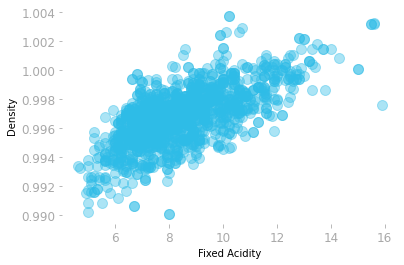

In [15]:
plt.scatter(data['fixed acidity'], data['density'], alpha=0.4)
# [...] Add axes, labels etc.

plt.xlabel("Fixed Acidity")
plt.ylabel("Density")

plt.show()


<img src="images/blank.png" id="fig:ch02_density_fixed_acidity" alt="Figure 21: Density of wines as a function of fixed acidity. Each point corresponds to a data observation." />
Figure 21: Density of wines as a function of fixed acidity. Each point corresponds to a data observation.

Let’s create the variables `X` and `y` from the Pandas dataframe:

In [16]:
X = data['fixed acidity'].to_numpy().reshape(-1, 1)
X.shape

(1599, 1)

In [17]:
y = data['density'].to_numpy().reshape(-1, 1)
y.shape

(1599, 1)

You need to reshape the Numpy arrays to use them in the following
Sklearn method.

You’ll also standardize the data: transforms the variables to have a
mean equals to zero and a standard deviation equals to one (you’ll find
more details about the mean and the standard deviation in
Section 2.1.) :

In [18]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
y = standard_scaler.fit_transform(y)

#### Derivative of the Cost Function

You can use your `MSE_derivative` function to calculate the derivative
using these data. Let’s try it with $\theta=0$:

In [19]:
MSE_derivative(x=X, y=y, theta=0)

-0.6680472921189744

This negative value tells you that you need to increase $\theta$ if you
want to reduce the cost (you can still refer to Figure
[19](#fig:ch02_cost_mse_theta) and the last section).

#### Parameter Update

A large derivative value means that the slope is steep. In this case,
you want to add or subtract a large value to approach the minimum
rapidly. This is why you update the parameters by subtracting the value
of the derivative to the parameter: a large value will largely change
the parameter and a small value not so much.

In addition, a weight, called the *learning rate*, is applied to the
derivative allowing you to choose how large are the steps done at each
iteration. This is done by multiplying a scalar to the derivative
(called `lr` for ‘learning rate’ in the following code):

In [20]:
lr = 0.01
theta = 0
theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
theta

0.006680472921189744

This is the value of $\theta$ after the update. Let’s iteratively update
the parameters, store the cost and the parameter value and plot the cost
as a function of the parameters:

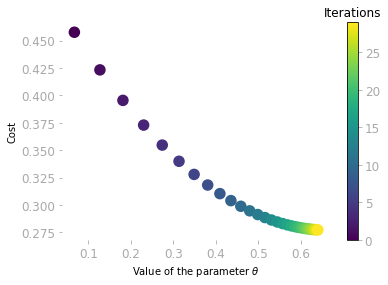

In [21]:
lr = 0.1
theta = 0

theta_all = []
cost_all = []

for i in range(30):
    theta = theta - lr * MSE_derivative(x=X, y=y, theta=theta)
    cost = MSE(X, y, theta)
    
    theta_all.append(theta)
    cost_all.append(cost)
    
plt.scatter(theta_all, cost_all, linewidth=1.5, c=np.arange(len(cost_all)))

plt.xlabel(r"Value of the parameter $\theta$")
plt.ylabel("Cost")
clb = plt.colorbar()
clb.ax.set_title('Iterations')
plt.show()


<img src="images/blank.png" id="fig:ch02_cost_theta_iterations" alt="Figure 22: Cost as a function of the parameter \theta. The cost decreases at each iteration." />
Figure 22: Cost as a function of the parameter <span class="math inline"><em>θ</em></span>. The cost decreases at each iteration.

You can see in Figure [22](#fig:ch02_cost_theta_iterations) that the
cost decreases at each iteration. Let’s see what is the best parameter
value that you got and use it to plot the corresponding regression line:

In [22]:
best_slope = theta_all[-1]
best_slope

0.6397279936234294

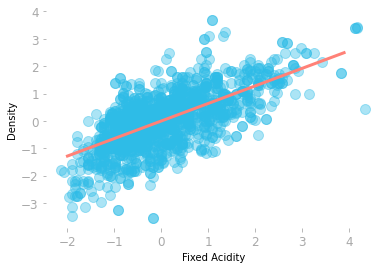

In [23]:
x_axis = np.arange(-2, 4, 0.1)
y_axis = best_slope * x_axis
plt.scatter(X, y, alpha=0.4, zorder=0)
plt.plot(x_axis, y_axis, c='#FF8177')

plt.xlabel("Fixed Acidity")
plt.ylabel("Density")
plt.show()


<img src="images/blank.png" id="fig:ch02_scatterplot_regression" alt="Figure 23: Density as a function of fixed acidity with the regression line." />
Figure 23: Density as a function of fixed acidity with the regression line.

You can see in Figure [23](#fig:ch02_scatterplot_regression) that after
30 iterations you reach a slope that fits the data well.

Congratulation, you have learned about one of the core mathematical
principles of machine learning: *gradient descent*. In machine learning,
algorithms *learn* by minimizing the cost function. Instead of
calculating the cost for all combination of parameters, derivatives
tells you how to modify the parameter to decrease the cost.

### 1.3.4 BONUS: MSE Cost Function With Two Parameters

You saw in this section how to minimize a cost function for a single
parameter model. You’ll see now how to proceed with multiple parameters.

#### The Cost Function

You’ll calculate the gradient of the MSE cost function for linear
regression using two parameters: the $y$-intercept of the line (that
we’ll denote $\theta_0$) and its slope ($\theta_1$).

With both parameters, the cost function is as follows:

$$
J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1} ^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
$$

You can see that the only difference with the cost function with one
parameter is that the prediction function is
$\theta_0 + \theta_1 x^{(i)}$ instead of just $\theta x^{(i)}$.

#### Partial Derivatives

With two parameters, you’ll need to calculate the partial derivatives
with respect to $\theta_0$ and $\theta_1$ independently. Here are the
intermediate functions to apply the chain rule, as you had with a single
parameter:

$$
g(\theta_0, \theta_1)=\theta_0 + \theta_1 x - y
$$

and

$$
f(g) = g^2
$$

You’ll have different derivatives with respect to $\theta_0$ and
$\theta_1$:

$$
\frac{\partial g}{\partial \theta_0} = 1
$$

and

$$
\frac{\partial g}{\partial \theta_1} = x
$$

You also have:

$$
\frac{\partial f(g)}{\partial g} = 2g
$$

Let’s calculate the partial derivatives of the cost function.

##### With Respect to $\theta_0$

For the derivative with respect to $\theta_0$, you have:

$$
\begin{aligned}
\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} &= \frac{\partial f(g)}{\partial g} \cdot \frac{\partial g}{\partial \theta_0} \\\\
&= 2g \cdot 1 \\\\
&= 2(\theta_0 + \theta_1 x - y) \\\\
\end{aligned}
$$

so you have:

$$
\begin{aligned}
\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_0} &= \frac{1}{2m}\sum_{i=1} ^m 2(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) \\\\
&= \frac{1}{m}\sum_{i=1} ^m \theta_0 + \theta_1 x^{(i)} - y^{(i)}
\end{aligned}
$$

##### With Respect to $\theta_1$

Finally, for the derivative with respect to $\theta_1$, you have:

$$
\begin{aligned}
\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} &= \frac{\partial f(g)}{\partial g} \cdot \frac{\partial g}{\partial \theta_1} \\\\
&= 2g \cdot x \\\\
&= 2(\theta_0 + \theta_1 x - y) \cdot x \\\\
\end{aligned}
$$

and

$$
\begin{aligned}
\frac{\partial J(\theta_0, \theta_1)}{\partial \theta_1} &= \frac{1}{2m}\sum_{i=1} ^m 2(\theta_0 + \theta_1 x^{(i)} - y^{(i)}) \cdot x^{(i)} \\\\
&= \frac{1}{m}\sum_{i=1} ^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)}) \cdot x^{(i)}
\end{aligned}
$$

These functions allow you to update both parameters. You can calculate
the derivative corresponding to each variable separately and update the
parameters according to the slope exactly as you did previously.

**Conclusion**

This concludes this chapter on calculus. You have learned about
derivatives and integrals, and this hands-on project showed that these
mathematical concepts are very important to understanding the core of
machine learning.

You can often gain intuition as you learn by trying things out with code
and by seeing multiple points of view: for instance, through plots,
equations, and examples in the real world. Mathematical notation is just
one more tool you’ll have at your belt.

